            timestamp  pressione_bar  portata_l_s  anomalia
0 2023-05-01 00:00:00       4.099343   120.990332         0
1 2023-05-01 01:00:00       3.972347   113.869505         0
2 2023-05-01 02:00:00       4.129538   100.894456         0
3 2023-05-01 03:00:00       4.304606    90.295948         0
4 2023-05-01 04:00:00       3.953169   110.473350         0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       283
           1       1.00      0.88      0.94        17

    accuracy                           0.99       300
   macro avg       1.00      0.94      0.97       300
weighted avg       0.99      0.99      0.99       300



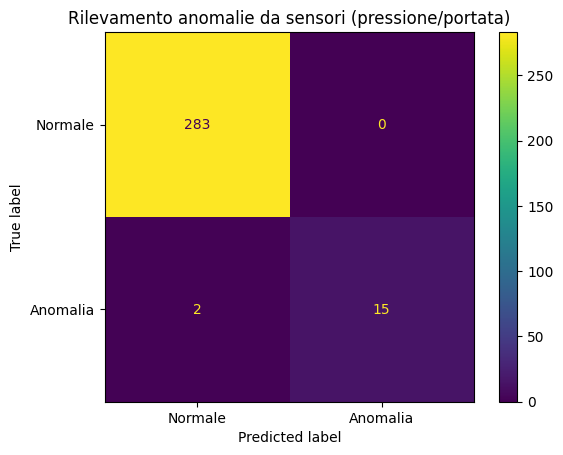

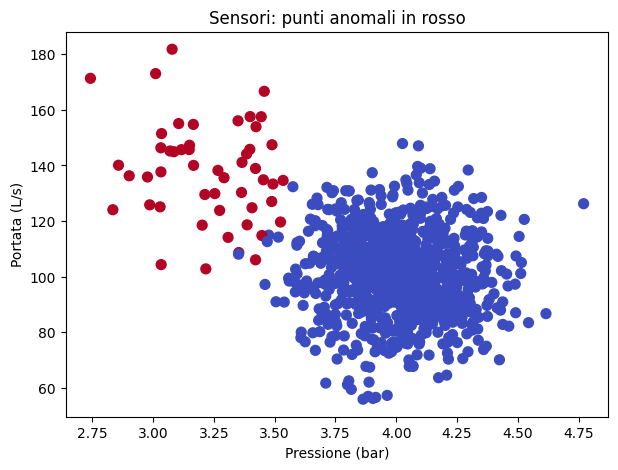

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import os

os.makedirs("data", exist_ok=True)
csv_path = "data/sensori_pressione.csv"

# --- Lettura o generazione dataset ---
if not os.path.exists(csv_path):
    np.random.seed(42)
    n = 1000
    time = pd.date_range("2023-05-01", periods=n, freq="h")
    pressione = np.random.normal(4.0, 0.2, n)
    portata = np.random.normal(100, 15, n)

    anomalie = np.zeros(n)
    anomalie_idx = np.random.choice(range(n), size=50, replace=False)
    pressione[anomalie_idx] -= np.random.uniform(0.4, 1.0, size=50)
    portata[anomalie_idx] += np.random.uniform(25, 50, size=50)
    anomalie[anomalie_idx] = 1

    df = pd.DataFrame({
        "timestamp": time,
        "pressione_bar": pressione,
        "portata_l_s": portata,
        "anomalia": anomalie.astype(int)
    })
    df.to_csv(csv_path, index=False)
else:
    df = pd.read_csv(csv_path, parse_dates=["timestamp"])

print(df.head())

# --- Analisi e modello ---
X = df[["pressione_bar", "portata_l_s"]]
y = df["anomalia"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Normale", "Anomalia"]).plot()
plt.title("Rilevamento anomalie da sensori (pressione/portata)")
plt.show()

# --- Visualizzazione fisica ---
plt.figure(figsize=(7,5))
plt.scatter(df["pressione_bar"], df["portata_l_s"], c=df["anomalia"], cmap="coolwarm", s=50)
plt.xlabel("Pressione (bar)")
plt.ylabel("Portata (L/s)")
plt.title("Sensori: punti anomali in rosso")
plt.show()